# A linha de tendência é aplicável ao meu caso?

A linha de tendência é vista como um meio de entendimento acerca do comportamento de um conjunto de dados. Esse conjunto de dados pode ser as vendas diárias de um estabelecimento comercial, número de chamados atendidos por uma equipe de suporte, entre outros. Com essa visão, o gestor busca entender qual a tendência futura e tomar as ações necessárias para eventuais correções de rumos. A questão que envolve esse tema está centrada no seguinte aspecto: seria a linha de tendência adequada para essa análise? Para responder essa pergunta, será utilizado um conjunto de dados fictício que representa a quantidade de funcionalidades semanais entregues por uma equipe de software. Para aqueles que entendem do tema, esse indicador é chamado de **throughput**.

In [23]:
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import LinearRegression
from scipy import stats

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [10]:
entregas = pd.read_csv('entregas.csv')
entregas.head()

,Dia,Entregas
0,01/07/16,2
1,08/07/16,5
2,15/07/16,0
3,22/07/16,14
4,29/07/16,5


A tabela acima é um pequeno extrato dos dados sob análise. Para melhor compreensão, será considerado o número da semana. Para os dados acima, será gerado um gráfico que conterá uma linha de tendência.

In [12]:
semanas = [i for i in range(1, entregas.shape[0] + 1)]
entregas['Dia'] = pd.to_datetime(entregas['Dia'])
x = np.array(semanas)
y = entregas['Entregas']
X = x.reshape(-1, 1)

In [6]:
lr = LinearRegression()
lr.fit(X, y)
y_lr_pred = lr.predict(X)

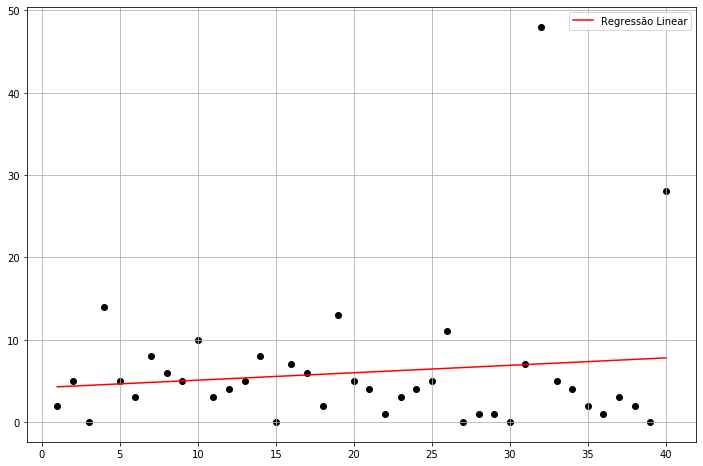

In [14]:
fig, ax = plt.subplots()
ax.grid(True)

plt.scatter(x, y, c='black')
plt.plot(semanas, y_lr_pred, c='red', label='Regressão Linear')
ax.legend()

A linha de tendência do gráfico acima demonstra que esse time, apesar da variabilidade das suas entregas, aparenta aumentar suas entregas ao longo do tempo. Entretanto, é preciso atentar para os fundamentos dessa ferramenta. A linha de tendência, como normalmente é conhecida, é uma reta de regressão linear.

A regressão linear, para que seja válida, possui alguns pressupostos. São eles:
* Independência dos dados
* Normalidade dos resíduos
* Homogeneidade da variância dos resíduos
* Aditividade dos efeitos do modelo

Vamos avaliar o pressuposto da normalidade dos resíduos para verificar a viabilidade do uso da regressão linear nesse caso.

In [16]:
residuals = y - y_lr_pred
stats.shapiro(residuals)

(0.6509690284729004, 1.6672602853873286e-08)

O resultado que interessa é o segundo resultado apresentado ($ 1.67 * 10^{-8} $), chamado de p-valor. Ele é o valor que avalia se um determinado conjunto de dados segue ou não a distribuição normal. O valor considerado nessa avaliação é geralmente 5%, ou 0,05. Como esse valor foi menor (1.6672602853873286e-08), então esse conjunto não é normal (na linguagem estatística diz-se que a hipótese foi rejeitada). Conclue-se, dessa forma, que o modelo não é adequado para a aplicação de regressão linear. E qual a solução?

Pode-se usar o estimador de Theil-Sen. Ele é um estimador livre de distribuições e pode informar a resposta necessária. Será efetuado o cálculo usando esse estimador para demonstrar a diferença.

In [20]:
ts = TheilSenRegressor(random_state=42)
ts.fit(X, y)

TheilSenRegressor(copy_X=True, fit_intercept=True, max_iter=300,
                  max_subpopulation=10000, n_jobs=None, n_subsamples=None,
                  random_state=42, tol=0.001, verbose=False)

In [21]:
y_ts_pred = ts.predict(X)

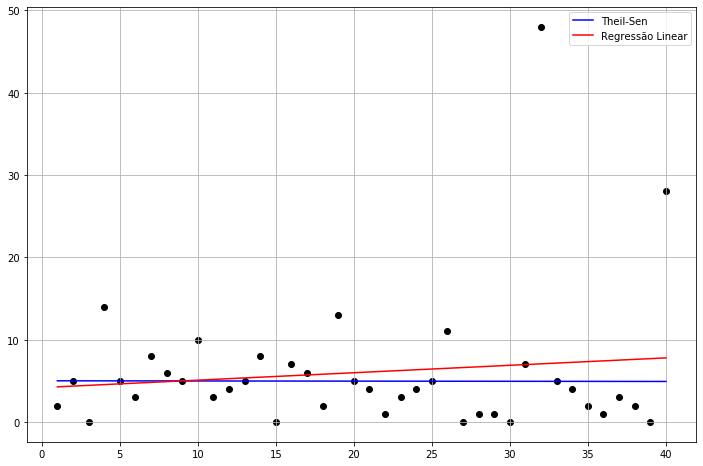

In [22]:
fig, ax = plt.subplots()
ax.grid(True)

plt.scatter(x, y, c='black')
plt.plot(semanas, y_ts_pred, c='blue', label='Theil-Sen')
plt.plot(semanas, y_lr_pred, c='red', label='Regressão Linear')
ax.legend()

A linha baseada no estimador de Theil-Sen mostra que as entregas possuem uma tendência de constância, ao contrário da linha de regressão linear. Além da não-aplicabilidade da regressão linear nesse conjunto de dados, a tendência de alta dessa linha pode levar a decisões gerenciais equivocadas.

Referências:
* Notas da aula 9 da disciplina de Métodos Quantitativos II do Programa de Mestrado Profissional Interdisciplinar da UNIFESP, Campus de São José dos Campos-SP, Prof. Dra. Camila B. Martins e Profa. Dra. Flávia Cristina M. Queiroz Mariano, ano de 2018.
* https://en.wikipedia.org/wiki/Theil%E2%80%93Sen_estimator